# Mixed strategy Nash EQ with `nashpy`

Key function to learn 
* `G = nashpy.Game(U1, U2)`: takes two matrices in the same form as before 
    * Bonus: when `U1 + U2` is constant everywhere, we have a constant sum game, which is equivalent to a zero sum game. 
* `G.support_enumeration()`: Solves the game by support enumeration. Finds both pure and mixed strategy equilibria. 


In [1]:
import numpy as np 
import pandas as pd
import nashpy # install using "pip install nashpy"
import matplotlib.pyplot as plt

In [2]:
def print_payoffs(U, A): 
    '''print_payoffs: Nicely formatted for a 2*2 game 
        INPUTS: 
            U1,U2: (matrices, dim=na1*na2) Payoffs 
            A1: (list of str, len=na1) List of actions of player 1
            A2: (list of str, len=na2) list of actions of player 2
        
        OUTPUT:
            tab: pandas dataframe, na1*na2 with payoff tuples 
    '''
    assert len(U) == 2, f'only implemented for 2-player games'
    assert len(A) == 2, f'only implemented for 2-player games'

    U1 = U[0]
    U2 = U[1]
    A1 = A[0]
    A2 = A[1]

    na1,na2 = U1.shape
    assert len(A1) == na1
    assert len(A2) == na2

    # "matrix" of tuples 
    X = [[(U1[r,c],U2[r,c]) for c in range(na2)] for r in range(na1)]

    # dataframe version 
    tab = pd.DataFrame(X, columns=A2, index=A1)
    
    return tab 

# Start

In [3]:
U1 = np.array([[0,1,-1], [-1,0,1], [1,-1,0]])
U2 = -U1
A1 = ['sten', 'saks','papir']
A2 = A1

In [4]:
print_payoffs([U1, U2], [A1, A2])

,sten,saks,papir
sten,"(0, 0)","(1, -1)","(-1, 1)"
saks,"(-1, 1)","(0, 0)","(1, -1)"
papir,"(1, -1)","(-1, 1)","(0, 0)"


In [5]:
G = nashpy.Game(U1,U2)

In [6]:
sol = G.support_enumeration()

In [7]:
sol = list(sol)

An asymmetric zero sum game

In [8]:
U1 = np.array([[0,2,-1], [-1,0,1], [1,-3,0]])
U2 = -U1

print_payoffs([U1, U2], [A1, A2])

,sten,saks,papir
sten,"(0, 0)","(2, -2)","(-1, 1)"
saks,"(-1, 1)","(0, 0)","(1, -1)"
papir,"(1, -1)","(-3, 3)","(0, 0)"


In [9]:
sol = nashpy.Game(U1,U2).support_enumeration()
list(sol)

[(array([0.38888889, 0.33333333, 0.27777778]),
  array([0.44444444, 0.16666667, 0.38888889]))]

# More complex

In [10]:
U1 = np.array([ 
[8,	9,	5,	4,	8], 
[9,	1,	7,	5,	4],  
[5,	7,	2,	9,	7],  
[3,	9,	2,	0,	6],  
[7,	5,	3,	0,	2]])

U2 = np.array([ 
[2,	7,	5,	6,	3], 
[4,	0,	6,	8,	1],  
[4,	9,	8,	6,	0],  
[4,	8,	2,	1,	3],  
[4,	4,	9,	4,	2]])

U = [U1, U2]

A1 = ['Run', 'Hide', 'Play dead', 'Fight', 'Freeze']
A2 = A1
A = [A1, A2]
print_payoffs(U, A)

,Run,Hide,Play dead,Fight,Freeze
Run,"(8, 2)","(9, 7)","(5, 5)","(4, 6)","(8, 3)"
Hide,"(9, 4)","(1, 0)","(7, 6)","(5, 8)","(4, 1)"
Play dead,"(5, 4)","(7, 9)","(2, 8)","(9, 6)","(7, 0)"
Fight,"(3, 4)","(9, 8)","(2, 2)","(0, 1)","(6, 3)"
Freeze,"(7, 4)","(5, 4)","(3, 9)","(0, 4)","(2, 2)"


In [11]:
G = nashpy.Game(U1,U2)
G

Bi matrix game with payoff matrices:

Row player:
[[8 9 5 4 8]
 [9 1 7 5 4]
 [5 7 2 9 7]
 [3 9 2 0 6]
 [7 5 3 0 2]]

Column player:
[[2 7 5 6 3]
 [4 0 6 8 1]
 [4 9 8 6 0]
 [4 8 2 1 3]
 [4 4 9 4 2]]

In [12]:
sol = list(G.support_enumeration())
sol

[(array([ 1.,  0.,  0., -0.,  0.]), array([ 0.,  1.,  0., -0.,  0.])),
 (array([0., 0., 0., 1., 0.]), array([ 0.,  1.,  0., -0.,  0.])),
 (array([0.4, 0.2, 0.4, 0. , 0. ]),
  array([3.70074342e-17, 1.64556962e-01, 4.81012658e-01, 3.54430380e-01,
         0.00000000e+00]))]

Plotting results for 3 equilibria


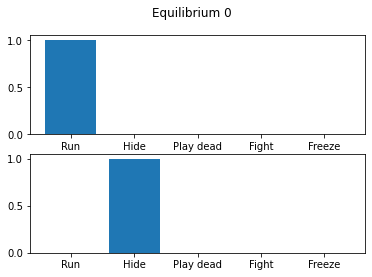

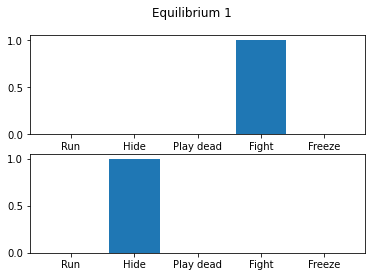

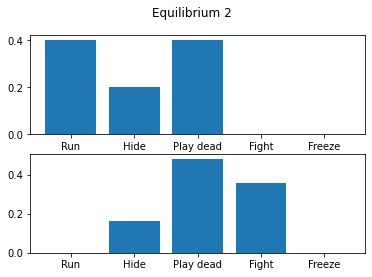

In [13]:
print(f'Plotting results for {len(sol)} equilibria')
for i,eq in enumerate(sol): 
    fig,axs  = plt.subplots(2)
    fig.suptitle(f'Equilibrium {i}')
    axs[0].bar(A1, eq[0], label=f'player 1')
    axs[1].bar(A2, eq[1], label=f'player 2')

**Conclusion:** It turns out that this game had, in addition to the two pure strategy equilibria, an additional equilibrium in mixed strategies. This equilibrium only has three of the five strategies in the support for both players. 

In [14]:
a1,a2 = sol[2]

Let's compute the expected utilities to player 1 from choosing each of the pure strategies available: 

In [15]:
Eu1 = U1@a2 # matrix * vector = vector 
pd.DataFrame(zip(A[0], Eu1), columns=['action', 'expected utility'])

,action,expected utility
0,Run,5.303797
1,Hide,5.303797
2,Play dead,5.303797
3,Fight,2.443038
4,Freeze,2.265823


We see that the three strategies in the support, `Run, Hide, Play dead`, each give the exact same utility, while the two other strategies not in the support give lower utilities. This makes sense given that 
1. a player must be indifferent between the pure strategies in the support of a mixed strategy in order to be willing to mix (otherwise, choosing the pure strategy with the highest expected utility is better than mixing), 
2. the two pure strategies outside the support give worse expected utility than those in the support (otherwise the mix over those three would be dominated). 